# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [3]:
!pip install openpyxl

In [4]:
import pandas as pd

Ось так можемо переглянути, які є листки в Excel файлі:

In [5]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'data_fp/Grocery Database.xlsx'

In [6]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [7]:
descr = xl.parse('Fact Summary')
descr

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [8]:
df = pd.read_excel(path_to_file)

In [9]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

### Розпочнемо з аналізу даних для опрацювання.

- розмір табличних даних, які містить лист 'Grosto DB'.

In [10]:
df.shape
print (f'Набір даних містить {df.shape[0]} рядків та {df.shape[1]} колонок.')

Набір даних містить 50447 рядків та 32 колонок.


- первинний огляд даних
(опис даних по колонкам виводили вище з листа 'Fact Summary').

In [11]:
df.head(15)

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,...,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,...,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020


- перевіримо коректість даних певних розрахункових колонок, які несуть цінність для подальшого коректного аналізу та дослідження. Перевіримо та створимо нові колонки для 'Net Bill Amount' та 'Gross Bill Amount'. Для прикладу перевіремо, чи дійсно ми маємо розбіжності у калькульованих даних.

In [12]:
df[df['Receipt Number'] == 'GIJ00003'].Amount.sum()

30.769199999999998

In [13]:
df[df['Receipt Number'] == 'GIJ00004'].Amount.sum()

24.245199999999997

Бачимо, що дані відрізняються. Сума по рахунку 'GIJ00003' в наданих даних 38.3526, а по рахунку 'GIJ00004' 21.1974, що демонструє розбіжнісь з перевірочними підрахунками.

In [14]:
df['Net Bill Amount New'] = df.Price * df.QTY * (1 - df.DISC)

In [15]:
df['Gross Bill Amount New'] = df['Net Bill Amount New'] * (1 + df.GST)

In [16]:
df[:3]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount New,Gross Bill Amount New
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,12.1128,13.32408
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,22.9680,25.26480
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,13.1769,14.49459


- проведемо перевірку на наявність пропущених значень у даних.

In [17]:
df.isna().sum()

Receipt Number           0
Date                     0
Year                     0
Month                    0
Time                     0
Mobile Number            0
Membership ID            0
Loyalty Card Points      0
Age                      0
Gender                   0
City                     0
Country                  0
Category                 0
Sub_Category             0
Items                    0
Brand                    0
Description              0
Price                    0
QTY                      0
DISC                     0
Amount                   0
Net Bill Amount          0
GST                      0
Gross Bill Amount        0
Payment Mode             0
Bank Name                0
% Profit Margin          0
% Operating Cost         0
% Product Cost           0
Profit Margin            0
Operating Cost           0
Product Cost             0
Net Bill Amount New      0
Gross Bill Amount New    0
dtype: int64

Пропущені значення відсутні.

- розглянемо типи даних у колонках.

In [18]:
df.dtypes

Receipt Number                   object
Date                     datetime64[ns]
Year                              int64
Month                             int64
Time                             object
Mobile Number                     int64
Membership ID                    object
Loyalty Card Points               int64
Age                               int64
Gender                           object
City                             object
Country                          object
Category                         object
Sub_Category                     object
Items                            object
Brand                            object
Description                      object
Price                           float64
QTY                               int64
DISC                            float64
Amount                          float64
Net Bill Amount                 float64
GST                             float64
Gross Bill Amount               float64
Payment Mode                     object


Всі типи влаштовують.

In [19]:
with pd.option_context('display.precision', 2):
    display(df.describe())

,Date,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,...,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Net Bill Amount New,Gross Bill Amount New
count,50447,50447.00,50447.00,5.04e+04,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00,...,50447.00,50447.00,50447.00,5.04e+04,50447.00,50447.00,50447.00,50447.00,50447.00,50447.00
mean,2018-03-01 09:42:27.410153216,2017.67,6.48,9.89e+09,18.36,35.80,7.42,1.55,0.03,11.17,...,0.09,72.38,0.11,1.50e-01,0.74,1.20,1.73,8.58,11.17,12.12
min,2016-01-01 00:00:00,2016.00,1.00,7.92e+09,0.00,15.00,0.84,1.00,0.01,0.80,...,0.06,1.04,0.05,1.50e-01,0.70,0.07,0.13,0.61,0.80,0.85
25%,2017-03-14 00:00:00,2017.00,3.00,9.84e+09,6.00,23.00,4.28,1.00,0.02,5.21,...,0.07,38.62,0.08,1.50e-01,0.72,0.55,0.81,4.08,5.21,5.67
50%,2018-04-02 00:00:00,2018.00,7.00,9.90e+09,14.00,35.00,5.98,2.00,0.03,8.63,...,0.07,63.91,0.11,1.50e-01,0.74,0.93,1.33,6.65,8.63,9.38
75%,2019-03-05 00:00:00,2019.00,10.00,9.95e+09,26.00,47.00,9.47,2.00,0.04,14.02,...,0.10,98.08,0.13,1.50e-01,0.77,1.51,2.18,10.83,14.02,15.19
max,2019-12-31 00:00:00,2019.00,12.00,1.00e+10,116.00,75.00,40.33,9.00,0.05,299.83,...,0.12,559.33,0.15,1.50e-01,0.80,26.23,46.85,239.24,299.83,317.82
std,NaN,1.11,3.45,7.64e+07,16.16,14.02,4.75,0.65,0.01,9.23,...,0.02,49.09,0.03,1.32e-13,0.03,1.06,1.43,7.13,9.23,10.00


Дивимось на максимальне значення та 75%, бачимо значний розкид даних в цьому проміжку (в порівнянні з іншими) по показникам Price, Profit Margin, Net Bill Amount New та Gross Bill Amount New.

Імпортуємо необхідні бібліотеки.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## №1 
### В якуму місті найбільша виручка за всі роки у вибірці даних?

In [21]:
df.groupby(['Country', 'City'])['Gross Bill Amount New'].sum().round(2)

Country      City        
Indonesia    Jakarta         113314.96
Malaysia     Kuala Lumpur    128492.52
Philippines  Manila          150066.00
Singapore    Bedok           145161.36
             Woodlands        74370.24
Name: Gross Bill Amount New, dtype: float64

Спостерігаємо 2 лідируючі міста по виторгу такі як Маніла (Філіпіни) та Бедок (Сінгапур), найменший у Вудлендс(Сінгапур) - можемо припустити, що магазин знаходиться не в густо населеній зоні чи є інші більш популярні магазини в регіоні.

## №2
### Яких покупців по гендеру більше у співвідношенні?

In [22]:
df.Gender.value_counts(normalize=True).round(2)

Gender
Female    0.83
Male      0.17
Name: proportion, dtype: float64

З результатів бачимо, що головна аудиторія покупців - це жінки (83%).

## №3
### В якому віці в цільовій аудиторії (жінки) - найбільше витрачають на покупки?

In [23]:
age_grossamount = df[df['Gender'] == 'Female'].groupby('Age')['Gross Bill Amount New'].sum().round(2).sort_values(ascending=False).reset_index()
age_grossamount

,Age,Gross Bill Amount New
0,20,22259.02
1,19,17632.55
2,18,16431.75
3,16,15521.00
4,17,15030.69
...,...,...
56,70,787.61
57,59,729.22
58,64,713.59
59,67,628.58


Молодша аудиторія жінок, віком від 16-20 років - витрачає найбільше на покупки у наших магазинах, також бачимо, чим старше покупець - тим менше витрачає.

## №4
### Перевіримо наглядно, чи дійсно молодша аудиторія витрачає більше (розгянемо і жінок і чоловіків)?

<Axes: xlabel='Age', ylabel='Gross Bill Amount New'>

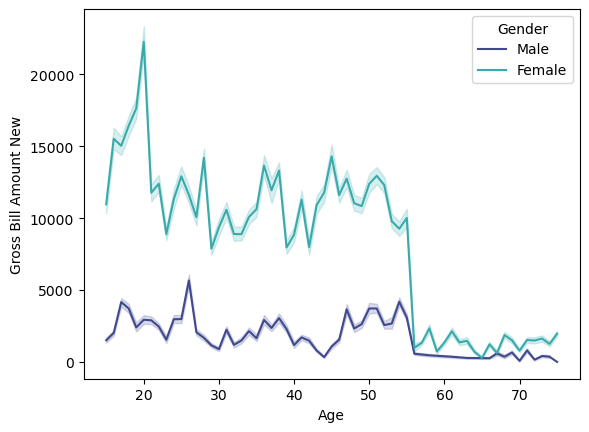

In [24]:
sns.lineplot(x = 'Age', y = 'Gross Bill Amount New', data = df, palette = 'mako', hue = 'Gender', estimator = 'sum')

Також можемо подивитись, використовуючи інший спосіб

In [25]:
df_new = df.groupby(['Year', 'Month', 'Age'])['Gross Bill Amount New'].sum().round(2).reset_index()
df_new

,Year,Month,Age,Gross Bill Amount New
0,2016,1,15,230.19
1,2016,1,16,136.69
2,2016,1,17,204.41
3,2016,1,18,687.12
4,2016,1,19,168.08
...,...,...,...,...
2420,2019,12,67,29.09
2421,2019,12,71,105.28
2422,2019,12,73,119.71
2423,2019,12,74,10.41


In [26]:
df_new['Date'] = df_new.apply(lambda row: f'{int(row.Year)}-{int(row.Month)}', axis= 1)
df_new

,Year,Month,Age,Gross Bill Amount New,Date
0,2016,1,15,230.19,2016-1
1,2016,1,16,136.69,2016-1
2,2016,1,17,204.41,2016-1
3,2016,1,18,687.12,2016-1
4,2016,1,19,168.08,2016-1
...,...,...,...,...,...
2420,2019,12,67,29.09,2019-12
2421,2019,12,71,105.28,2019-12
2422,2019,12,73,119.71,2019-12
2423,2019,12,74,10.41,2019-12


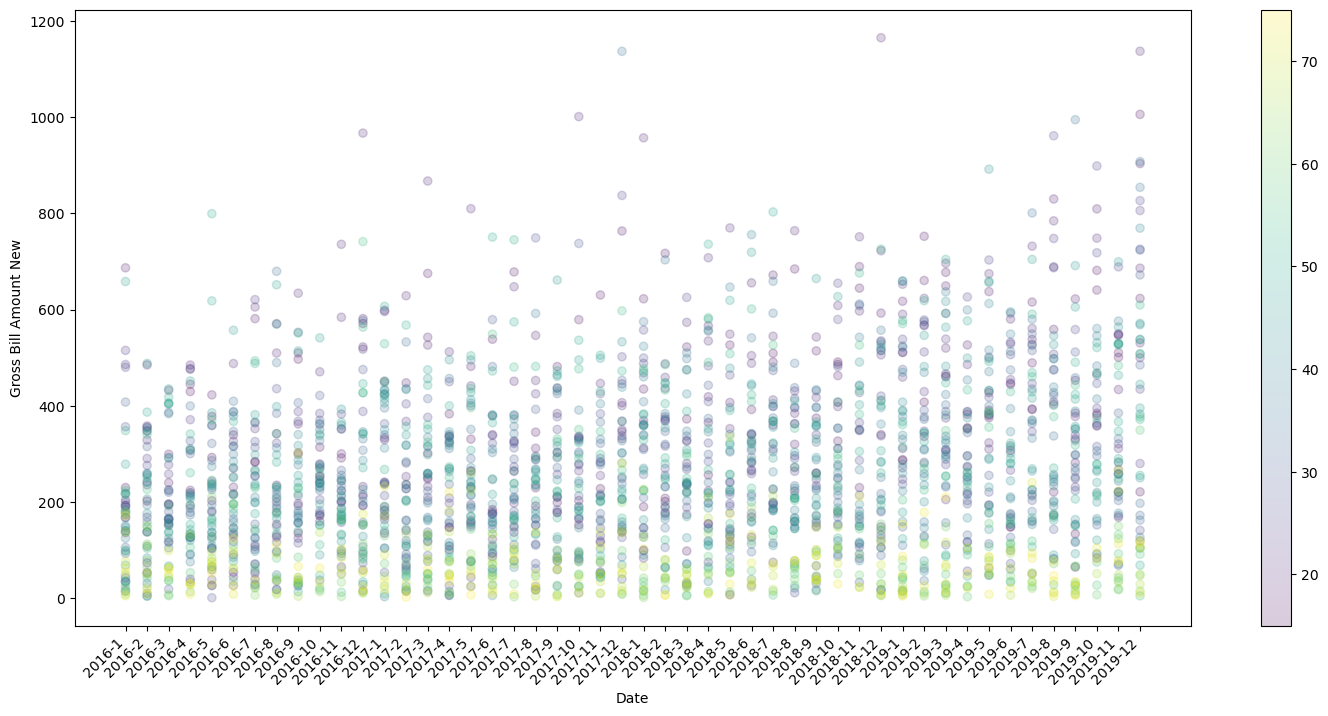

In [27]:
col_x = 'Date'
col_y = 'Gross Bill Amount New'
color = 'Age'

plt.figure(figsize=(18,8))
plt.scatter(df_new[col_x], df_new[col_y], alpha=0.2, c=df_new[color])
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.colorbar();
plt.xticks(rotation=45, ha='right');
plt.show()

На графіку розсіювання бачимо, що старша аудиторія витрачає менше грошей на покупки, але цей графік не показує чітко як розподіляється виторг по іншим віковим група. Можливо потрібно розглянути варіанти реклами для цієї аудиторії - для підвищення продажів, але сфокосуватись на заохоченні цільової аудиторії.

## №5
### Перевіримо по рокам, як змінювався виторг по категоріям.

In [28]:
gross_amount_years = df.pivot_table(index = 'Year', columns = 'Category', values = 'Gross Bill Amount New', aggfunc = 'sum')
gross_amount_years

Category,Bakery & Breakfast,Beauty,Beverages,"Choco, Snacks, Sweets","Dairy, Chilled & Eggs",Frozen,Fruit & Vegetable,Health,Household,Kitchen & Dining,Meat & Seafood,Mother & Baby,Party Supplies,Pet Care,Rice & Cooking Essentials,"Wines, Beers & Spirits"
Year,,,,,,,,,,,,,,,,
2016,12386.744517,16821.715853,5621.442580,6186.901283,7794.509472,17086.028477,7448.094049,4121.433326,5612.759604,3302.664314,8417.433890,9026.973195,2584.880463,7670.564342,2803.048295,7209.017164
2017,12716.325251,19998.148737,6342.306640,6450.496935,8973.071531,17754.398305,10082.689819,5351.485601,5735.398708,3413.027761,9195.875212,8042.029178,3433.497756,9380.940869,3140.599013,8643.726669
2018,14593.475821,22031.663492,8503.361433,7441.129917,10218.004558,19990.251436,10173.906227,5978.287493,7055.712120,4247.054355,11685.280112,10118.775730,3586.399798,10317.851196,3665.423010,9323.464423
2019,17999.044016,27072.620858,8881.032350,8209.054317,11480.904866,25788.132984,12185.044498,6682.996734,8948.459406,4607.352790,12972.898504,12510.302653,4238.038909,11396.389391,4334.404766,12420.131844


Спостерігаємо, що по всім категоріям виторг зріс з роками. Це може бути зумовлене збільшенням покупців, а також збільшенням цін.

## №6
### Перевіримо по рокам, як змінювався виторг по категоріям.

In [29]:
paymethod_year = df.groupby(['Year', 'Payment Mode'])['Payment Mode'].value_counts()
paymethod_year

Year  Payment Mode
2016  Card            3226
      Cash            3459
      Wallet          3541
2017  Card            3734
      Cash            4126
      Wallet          3784
2018  Card            4718
      Cash            4009
      Wallet          4504
2019  Card            5471
      Cash            4837
      Wallet          5038
Name: count, dtype: int64

Можна зробити виснивок, що три види оплат використовуються майже в однаковій пропорції. Не можна виділити, що один з видів оплат переважає над іншим/іншими. Але все рівно бачимо, що оплата готівкою - втрачає популяність. 

## №7
### Продемонструємо як розподілились види оплат наглядно (за всі роки)

In [30]:
paymethod = df.groupby(['Payment Mode'])['Payment Mode'].value_counts()
paymethod

Payment Mode
Card      17149
Cash      16431
Wallet    16867
Name: count, dtype: int64

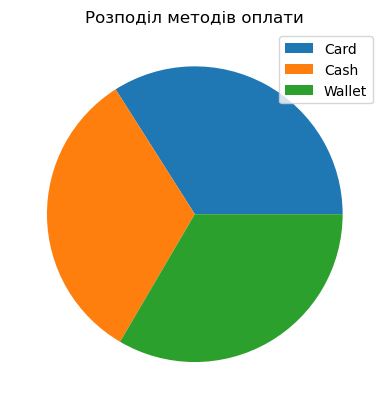

In [31]:
plt.pie(paymethod)
plt.title('Розподіл методів оплати')
plt.legend(labels = ['Card', 'Cash', 'Wallet']);

Бачимо, що майже три рівні частини між видами оплат. Можливо потрібно запропонувати додаткову знижку чи лояльність для збільшення оплати через Wallet, для зменшення показника Cash.

## №8
### Розглянемо найдорожчі товари (топ 3).

In [32]:
top_products = df[['Items', 'Price']].sort_values(by = ['Price'], ascending=False).head(5)
top_products

,Items,Price
3943,Villa Sandi imperial champagne,40.33
18446,Rothschild Cuvee brut champagne,40.07
19785,Bollinger Pink platted moscato rose,39.04
45108,Monster Energy Drink,38.31
47466,Monster Energy Drink,38.31


Найдорожчими товарами є алкогольні напої.

## №9
### Чи залежить сума виручки від сезонності (за всі роки сумарно)?

In [33]:
df_grossamount_by_month = df.groupby('Month')['Gross Bill Amount New'].sum().round(2).reset_index()
df_grossamount_by_month

,Month,Gross Bill Amount New
0,1,53087.02
1,2,46367.48
2,3,50258.29
3,4,46180.30
4,5,51297.94
5,6,48163.08
6,7,52517.26
7,8,48651.30
8,9,48414.95
9,10,51752.72


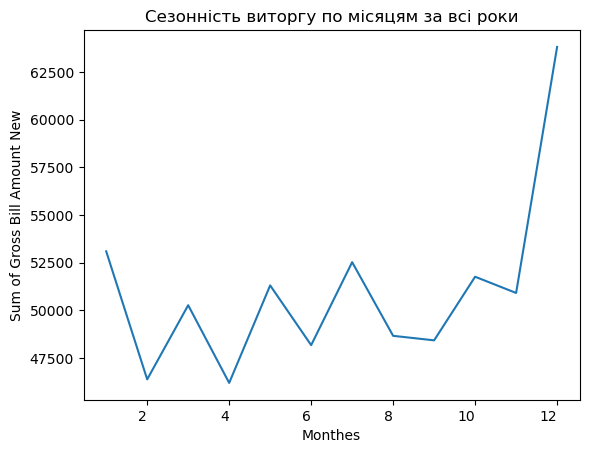

In [34]:
x = 'Month'
y = 'Gross Bill Amount New'

plt.plot(df_grossamount_by_month[x], df_grossamount_by_month[y])
plt.xlabel('Monthes')
plt.ylabel('Sum of Gross Bill Amount New')
plt.title('Сезонність виторгу по місяцям за всі роки')
plt.xticks(ha='right');

З графіку бачимо, що виторг зростає перед новим роком, можемо припустити, що відбувається зростання закупівель продуктів та подарунків перед святами.

## №10
### Розглянемо, які саме категорії товарів купувались більше у Грудні місяці кожного року (топ-5)?

In [35]:
popular_in_december = df[df['Month'] == 12].groupby(['Year', 'Category']).Category.value_counts().reset_index()
popular_in_december

,Year,Category,count
0,2016,Bakery & Breakfast,117
1,2016,Beauty,81
2,2016,Beverages,39
3,2016,"Choco, Snacks, Sweets",55
4,2016,"Dairy, Chilled & Eggs",50
...,...,...,...
59,2019,Mother & Baby,48
60,2019,Party Supplies,56
61,2019,Pet Care,99
62,2019,Rice & Cooking Essentials,57


In [36]:
popular_in_december_top = popular_in_december.groupby('Category')['count'].sum().reset_index().sort_values(by = ['count'], ascending=False).head(5)
popular_in_december_top

,Category,count
0,Bakery & Breakfast,533
5,Frozen,490
1,Beauty,429
6,Fruit & Vegetable,340
4,"Dairy, Chilled & Eggs",284


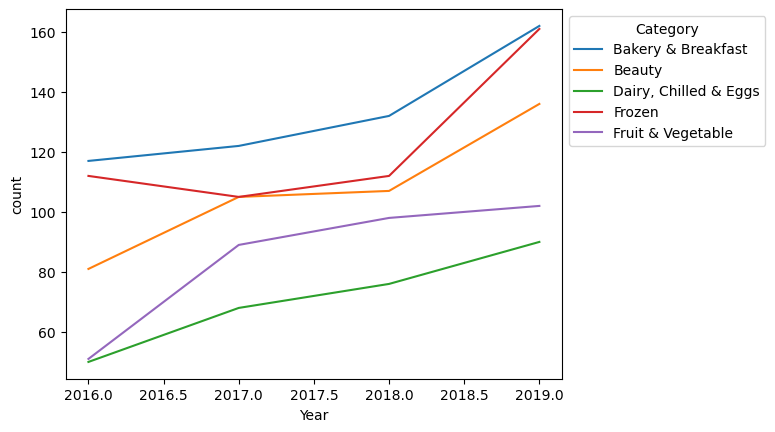

In [37]:
ax = sns.lineplot(x= "Year", y= "count", hue= "Category", data= popular_in_december[popular_in_december.Category.isin(popular_in_december_top.Category)])
sns.move_legend(ax, "upper left", bbox_to_anchor= (1, 1))

Обравши топ-5 категорій товарв, ми бачимо, що кожного року попит саме на ці товари зростає у грудні місяці. Так само спостерігаємо що зростає і кількість куплених товарів в категоріі, що зумовлене збільшенням покупців, або купують більше одиниць - маючи позитивний досвід попередніх покупок.

## №11
### Розглянемо, як розподілились підкатегорії топ-1 категорії Bakery & Breakfast в останньму році вибірки у грудні?

In [38]:
popular_category = df[(df['Month'] == 12) & (df['Category'] == 'Bakery & Breakfast')].groupby('Sub_Category')['Gross Bill Amount New'].sum().round(2).reset_index().sort_values(by = ['Gross Bill Amount New'], ascending=False)
popular_category

,Sub_Category,Gross Bill Amount New
1,Fresh Bread,1519.51
3,Oatmeals,1128.92
4,Pastries & Treats,832.59
5,Sliced Bread,801.03
2,"Jams, Honey & Spreads",793.67
0,Cereal & Protein Bars,768.98


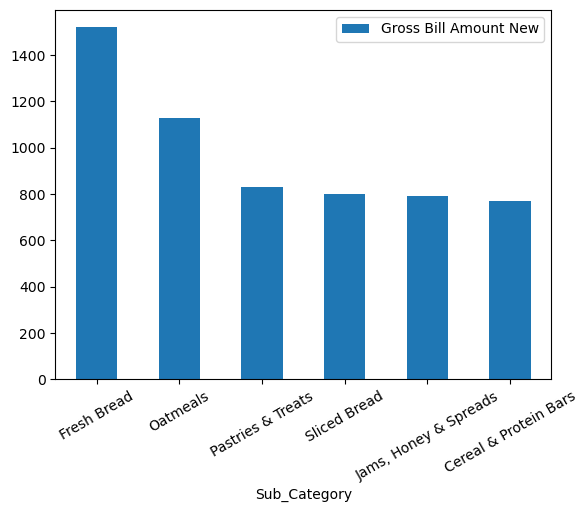

In [39]:
ax = popular_category.plot.bar(x= 'Sub_Category', y= 'Gross Bill Amount New', rot= 30)

В результаті вибірки бачимо, що найпопулярнішими товарами залишаються як протягом року(з попередніх досліджень) так і в місяці підвищеного попиту (грудень) - Fresh Bread та Oatmeals, що можна вважати товарами(їжею) базової потреби.

In [40]:
df.to_csv('data_fp/Grocery Database upd.csv', index=False)